In [59]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../../src')
from paths import PRE_FMTD_DB_DIR

from utils.functions import load_datasets_from_csv

from gaps.functions import find_series_gaps, flatten_series_gaps
from gaps.plots import show_gaps

from outliers.functions import find_outliers
from outliers.plots import show_outliers

from plot import show_series, show_serie

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
sns.set_style({'font.family':'sans', 'font.serif':'Helvetica', 'font.mono':'Helvetica'})
sns.set_context(rc={"font.size":11,"axes.titlesize":14,"axes.labelsize":12})

In [33]:
dts = load_datasets_from_csv(FMTD_DB_DIR).copy()

## 1.1 Preview

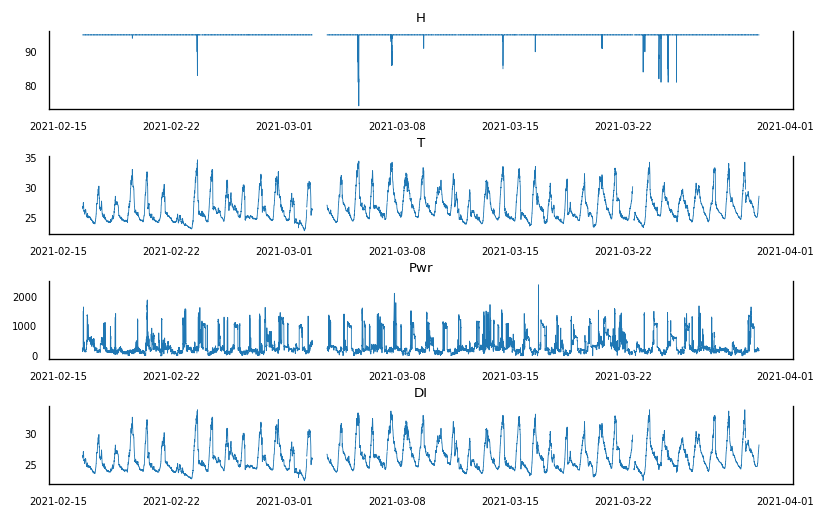

In [34]:
show_series(dts['house'])

## 1.2 Missing data

In [35]:
gaps = find_series_gaps(dts['house'])

In [36]:
l = list()
for gap in gaps['Pwr']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      431
6        3
13       1
32       1
60       1
667      1
dtype: int64

In [37]:
l = list()
for gap in gaps['T']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      431
7        3
14       1
32       1
60       1
667      1
dtype: int64

In [38]:
l = list()
for gap in gaps['H']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      431
7        3
14       1
32       1
60       1
667      1
dtype: int64

In [39]:
l = list()
for gap in gaps['DI']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      431
7        3
14       1
32       1
60       1
667      1
dtype: int64

In [41]:
gaps_flat = flatten_series_gaps(gaps)

In [42]:
for key in gaps_flat:
    dts['house']['Hole'+key] = np.NaN
    dts['house'].loc[gaps_flat[key] , ('Hole'+key)] = 0

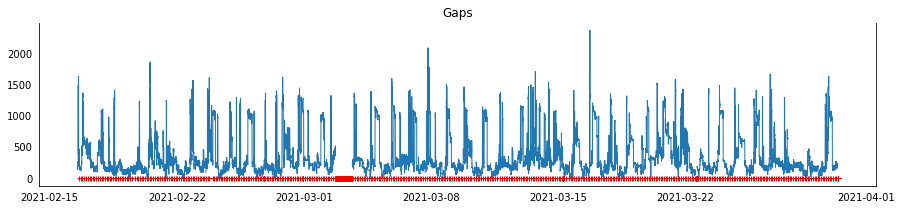

In [43]:
show_gaps(dts['house']['Pwr'], dts['house']['HolePwr'])

## 1.3 Outliers

In [45]:
fltr = find_outliers(dts['house']['Pwr'], 0.005)
(fltr == True).sum()

290

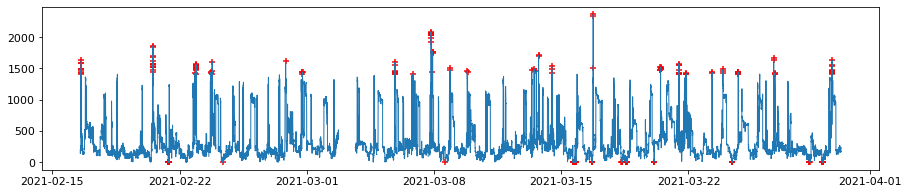

In [46]:
otlrs = dts['house'].loc[fltr, 'Pwr']
show_outliers(dts['house']['Pwr'], otlrs)

In [47]:
fltr = find_outliers(dts['house']['T'], 0.0005)
(fltr == True).sum()

14

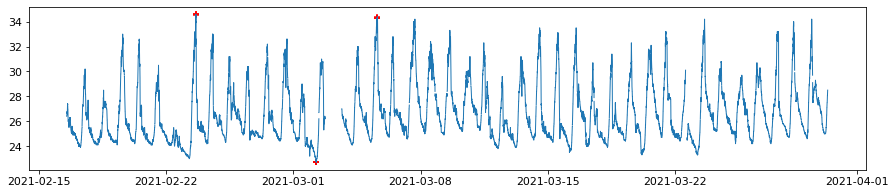

In [49]:
otlrs = dts['house'].loc[fltr, 'T']
show_outliers(dts['house']['T'], otlrs)

In [50]:
fltr = find_outliers(dts['house']['H'], 0.0005)
(fltr == True).sum()

11

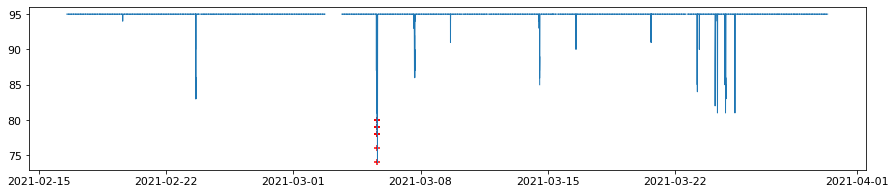

In [51]:
otlrs = dts['house'].loc[fltr, 'H']
show_outliers(dts['house']['H'], otlrs)

In [52]:
fltr = find_outliers(dts['house']['DI'], 0.0005)
(fltr == True).sum()

19

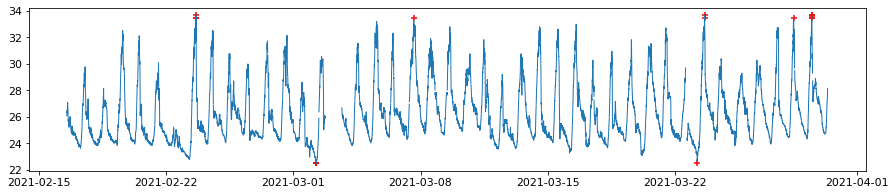

In [53]:
otlrs = dts['house'].loc[fltr, 'DI']
show_outliers(dts['house']['DI'], otlrs)

## 1.4 Wrong data

<AxesSubplot:>

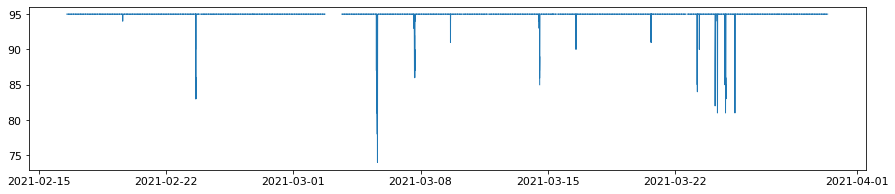

In [62]:
show_serie(dts['house']['H'])